In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("project1.csv")

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


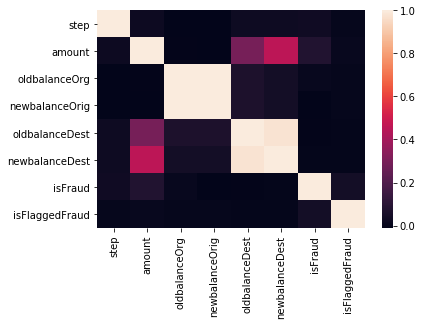

In [104]:
sns.heatmap(df.corr())

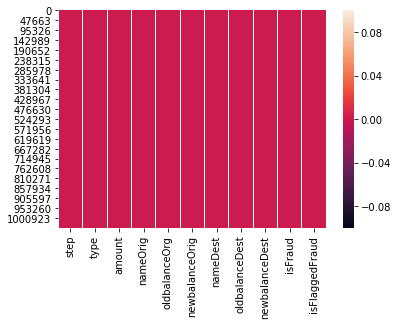

In [6]:
sns.heatmap(df.isnull())

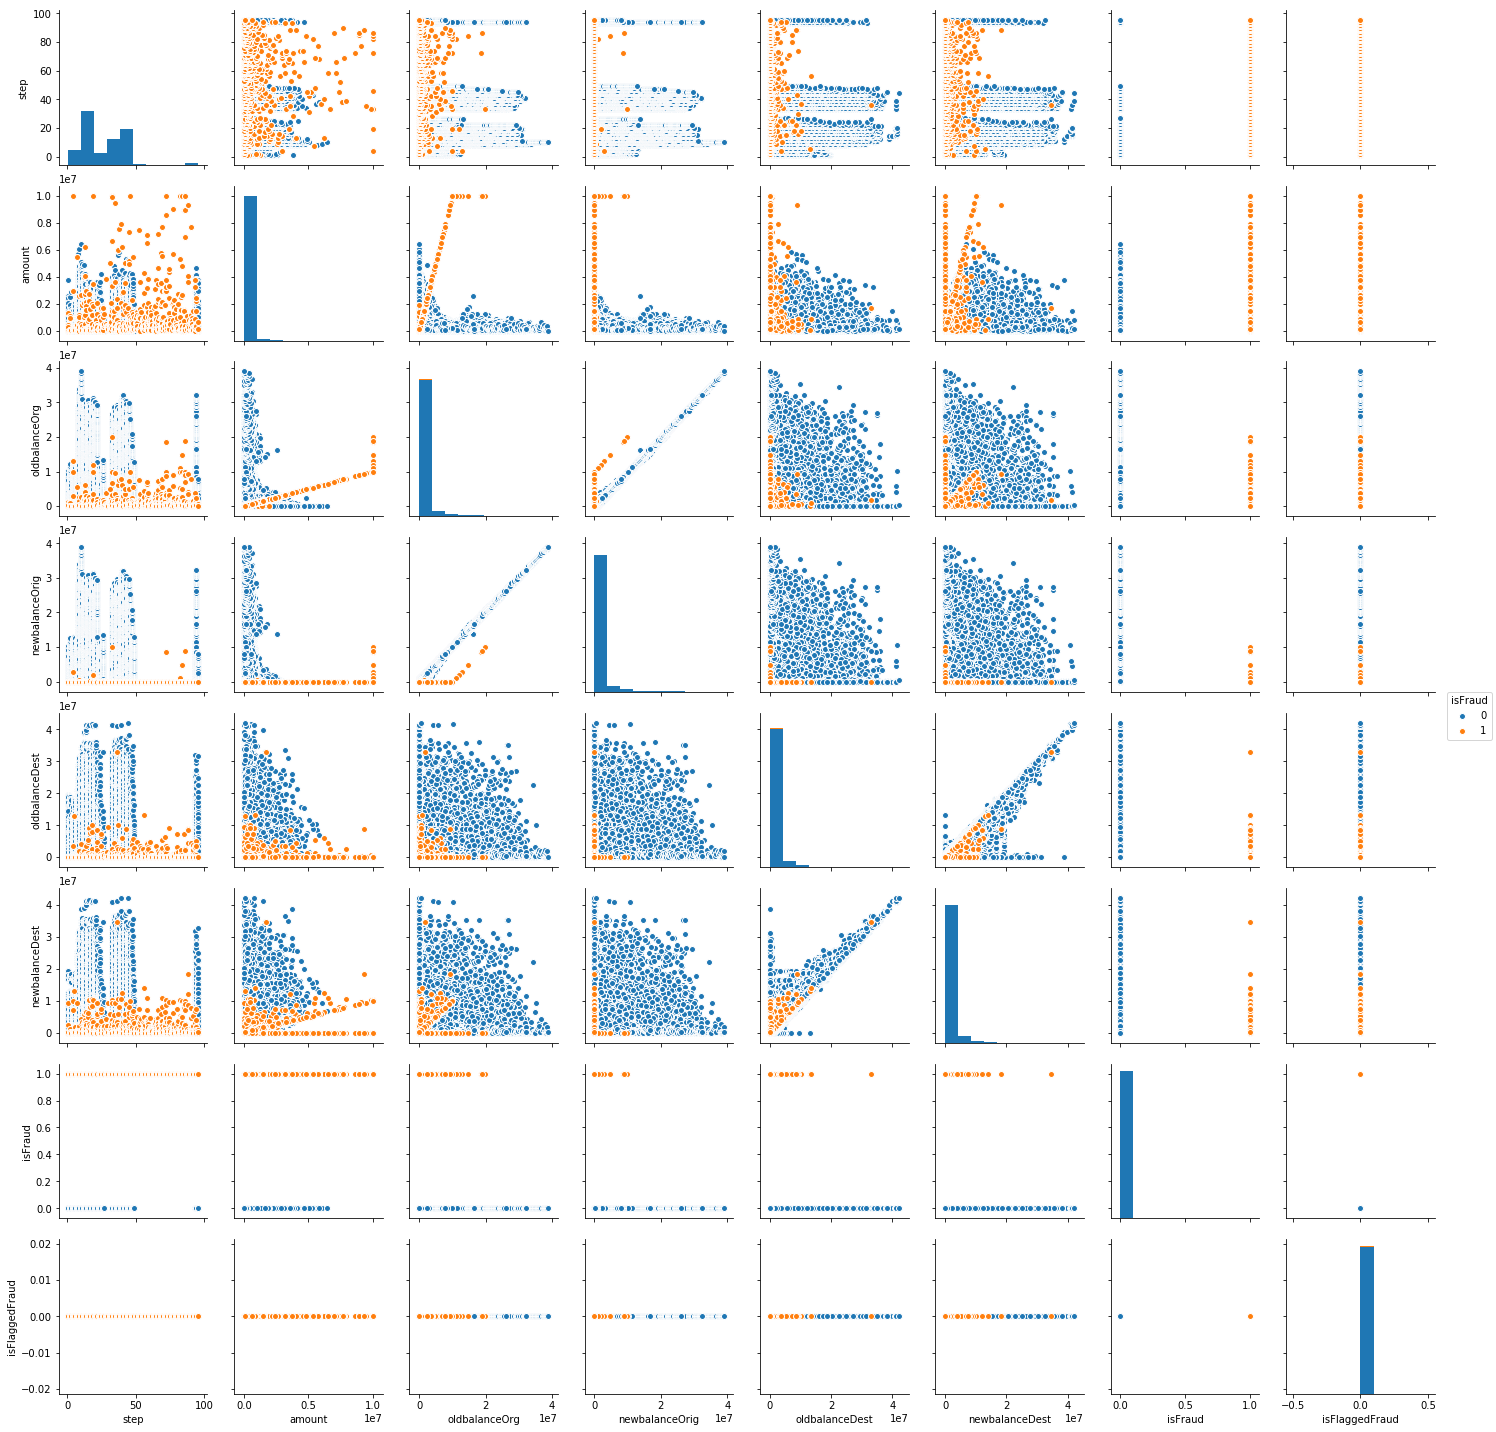

In [4]:
sns.pairplot(data=df,hue='isFraud')

In [204]:
df.loc[(df.type == 'TRANSFER') & (df.amount>200000) & (df.isFlaggedFraud == 1)].count()['isFlaggedFraud']

16

In [205]:
df[df['isFlaggedFraud'] ==1].count()['isFlaggedFraud']

16

In [105]:
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
len(dfFraudTransfer)

4097

In [106]:
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
len(dfFraudCashout)

4116

In [107]:
df[df['isFlaggedFraud']==1].count()['isFlaggedFraud']

16

In [108]:
df[df['isFlaggedFraud']==0].max()['amount']

92445516.64

In [ ]:
#drop it because wrong

In [109]:
df[df['isFlaggedFraud']==1].min()['amount']

353874.22

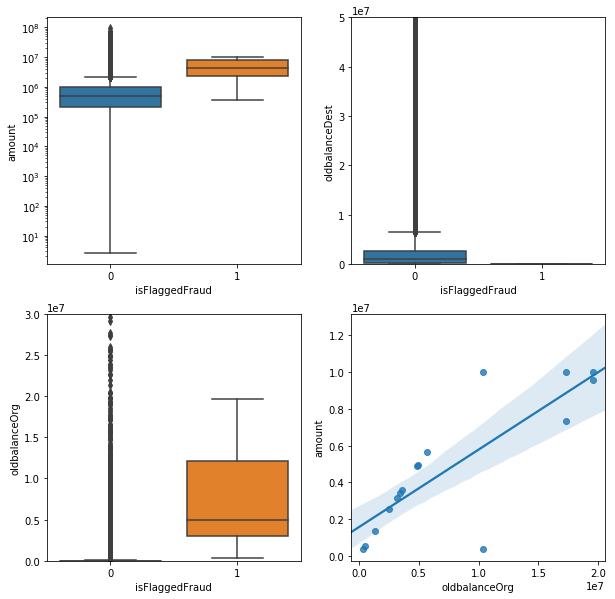

In [110]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
tmp = df.loc[(df.type == 'TRANSFER'), :]

a = sns.boxplot(x = 'isFlaggedFraud', y = 'amount', data = tmp, ax=axs[0][0])
axs[0][0].set_yscale('log')
b = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceDest', data = tmp, ax=axs[0][1])
axs[0][1].set(ylim=(0, 0.5e8))
c = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceOrg', data=tmp, ax=axs[1][0])
axs[1][0].set(ylim=(0, 3e7))
d = sns.regplot(x = 'oldbalanceOrg', y = 'amount', data=tmp.loc[(tmp.isFlaggedFraud ==1), :], ax=axs[1][1])
plt.show()


It can be easily seen that transactions with *isFlaggedFraud* 
set occur at
all values of *step*, similar to the complementary set of transactions. Thus
*isFlaggedFraud* does not correlate with *step* either and is therefore
seemingly unrelated to any explanatory variable or feature in the data

*Conclusion*: Although *isFraud* is always set when *isFlaggedFraud* is set, since
*isFlaggedFraud* is set just 16 times in a seemingly meaningless way, we 
can treat this feature as insignificant and discard it in the dataset 
without loosing information.

In [111]:
def func(s):
    for i in s:
        if(i=='M'):
            return True
        else:
            return False
func('Merchant')


True

In [181]:
df.loc[df.type == 'CASH_IN'].nameOrig.apply(func).value_counts()

False    1399284
Name: nameOrig, dtype: int64

In [113]:
df.loc[df.type == 'PAYMENT'].nameOrig.apply(func).value_counts()

False    2151495
Name: nameOrig, dtype: int64

In [114]:
df.loc[df.type == 'PAYMENT'].nameDest.apply(func).value_counts()

True    2151495
Name: nameDest, dtype: int64

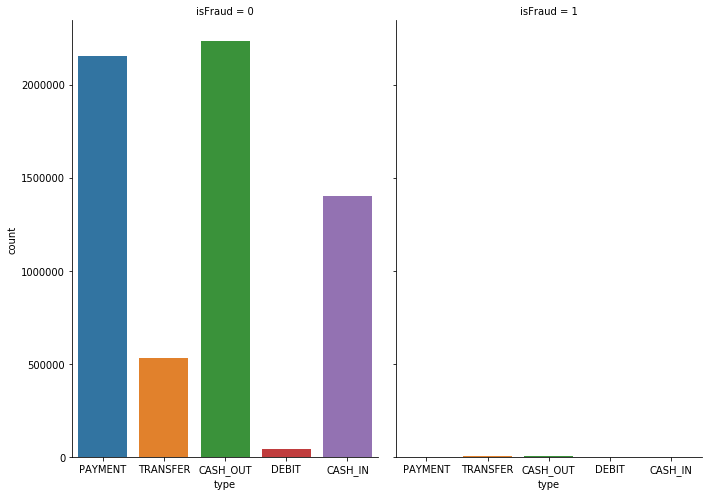

In [33]:
sns.factorplot(x="type",col='isFraud',data = df,kind ='count',size=7,aspect=.7)

# Data Cleaning

In [5]:
X = df.loc[(df['type'] == 'TRANSFER') | (df['type'] == 'CASH_OUT')]

In [6]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [7]:
X.reset_index(inplace=True,drop=True)

In [8]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
2,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
3,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
4,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [9]:
# Eliminate columns shown to be irrelevant for analysis in the EDA
X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud','step'], axis = 1,inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
2,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
3,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
4,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [151]:
X.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [11]:
typee = pd.get_dummies(X['type'],drop_first=True)

In [12]:
typee.head()

,TRANSFER
0,1
1,0
2,0
3,1
4,1


In [13]:
NewData = pd.concat([X,typee],axis=1)

In [14]:
NewData.drop(['type'],inplace=True,axis=1)

In [124]:
NewData.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,TRANSFER
0,181.00,181.0,0.0,0.0,0.00,1,1
1,181.00,181.0,0.0,21182.0,0.00,1,0
2,229133.94,15325.0,0.0,5083.0,51513.44,0,0
3,215310.30,705.0,0.0,22425.0,0.00,0,1
4,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


In [43]:
NewData.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'TRANSFER'],
      dtype='object')

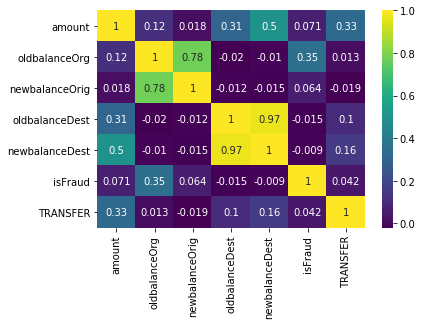

In [44]:
sns.heatmap(NewData.corr(),annot=True,cmap='viridis')

In [46]:
p=len(df.loc[(df.oldbalanceDest == 0) & (df.newbalanceDest == 0) & (df.amount) & (df.isFraud == 0)])

In [47]:
q=df.count()['isFraud']

In [48]:
(p/q) * 100

36.35618660237449

In [49]:
r=len(df.loc[(df.oldbalanceDest == 0) & (df.newbalanceDest == 0) & (df.amount) & (df.isFraud == 1)])

In [50]:
(r/q)*100

0.06396735935825179

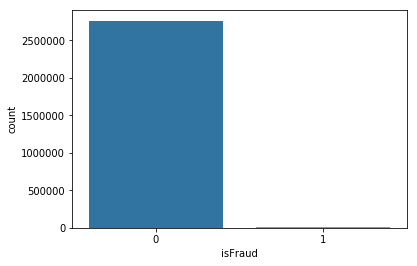

In [53]:
sns.countplot(x='isFraud',data=NewData)

In [148]:
frauds = len(NewData[NewData['isFraud'] == 1])

In [149]:
frauds

8213

In [152]:
fraud_indices = NewData[NewData.isFraud == 1].index

In [201]:
len(fraud_indices)

8213

In [75]:
#random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [156]:
non_fraud_indices = NewData[NewData.isFraud == 0].index

In [157]:
non_fraud_indices

Int64Index([      2,       3,       4,       5,       6,       7,       8,
                  9,      10,      11,
            ...
            2770103, 2770104, 2770105, 2770106, 2770107, 2770108, 2770109,
            2770110, 2770111, 2770112],
           dtype='int64', length=2762196)

In [158]:
non_frauds = len(NewData[NewData['isFraud'] == 0])

In [159]:
non_frauds

2762196

In [183]:
random_indices = np.random.choice(non_fraud_indices,frauds, replace=False)
len(random_indices)

8213

In [186]:
random_indices

array([2674211,  988153, 1973986, ...,  979807, 2450091,   65944],
      dtype=int64)

In [202]:
under_sample_indices1 = np.concatenate([random_indices,fraud_indices],axis =0)

In [203]:
len(under_sample_indices1)

16426

In [206]:
under_sample1 = NewData.loc[under_sample_indices1]

In [209]:
under_sample1[under_sample1['isFraud']==0].count()

amount            8213
oldbalanceOrg     8213
newbalanceOrig    8213
oldbalanceDest    8213
newbalanceDest    8213
isFraud           8213
TRANSFER          8213
dtype: int64

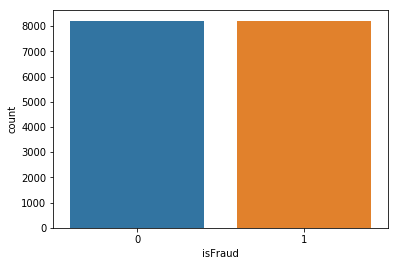

In [210]:
sns.countplot(x='isFraud',data=under_sample1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
123,1,TRANSFER,330757.04,C1494346128,103657.0,0.00,C564160838,79676.00,1254956.07,0,0
124,1,PAYMENT,1915.43,C822087264,11450.0,9534.57,M30699728,0.00,0.00,0,0
192,1,CASH_OUT,171508.59,C1033348658,0.0,0.00,C1971489295,443057.43,0.00,0,0


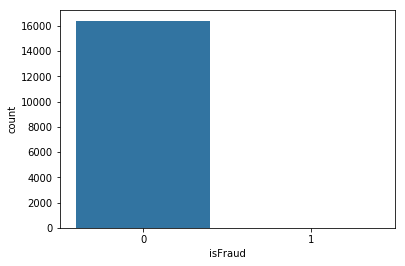

In [70]:
sns.countplot(x='isFraud',data=under_sample)

In [211]:
x = under_sample1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','TRANSFER']]

In [212]:
x.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,TRANSFER
2674211,11415.15,101148.0,89732.85,441994.20,453409.36,0
988153,234638.38,0.0,0.00,981407.22,1216045.61,0
1973986,232483.52,0.0,0.00,247577.15,480060.67,0
2089975,109125.59,0.0,0.00,809364.05,918489.64,0
854499,60568.72,0.0,0.00,2739132.90,2799701.61,0


In [213]:
x.count()

amount            16426
oldbalanceOrg     16426
newbalanceOrig    16426
oldbalanceDest    16426
newbalanceDest    16426
TRANSFER          16426
dtype: int64

In [42]:
y = NewData['isFraud']

In [36]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [163]:
from sklearn.linear_model import LinearRegression

In [164]:
lm = LinearRegression()

In [165]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [166]:
print(lm.intercept_)

-0.002186127636753485


In [167]:
lm.coef_

array([ 1.90837511e-10,  1.64874544e-07, -1.90696639e-07,  1.13711148e-09,
       -1.17549057e-09,  3.92443297e-03])

In [168]:
pred = lm.predict(x_test)

In [182]:
pred

array([-0.00275079, -0.00394613, -0.00217918, ..., -0.0024701 ,
        0.0003665 , -0.00207077])

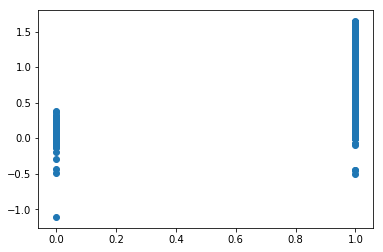

In [171]:
plt.scatter(y_test,pred)

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


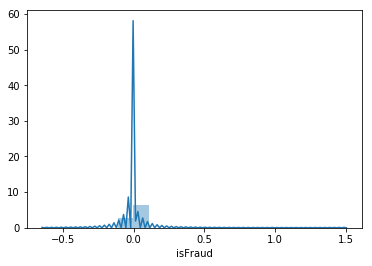

In [174]:
sns.distplot((y_test-pred),kde=True,bins=20)

In [175]:
from sklearn import metrics

In [180]:
metrics.mean_absolute_error(y_test,pred)

0.00737550057831312

# KNN NEIGHBOURS

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scalar = StandardScaler()

In [24]:
scalar.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
scaled_features = scalar.transform(x)

In [26]:
x.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'TRANSFER'],
      dtype='object')

In [27]:
df_feat = pd.DataFrame(scaled_features,columns = x.columns)

In [29]:
df_feat.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,TRANSFER
0,-0.357467,-0.188847,-0.106389,-0.403155,-0.438259,2.049062
1,-0.357467,-0.188847,-0.106389,-0.398142,-0.438259,-0.488028
2,-0.099576,-0.128591,-0.106389,-0.401952,-0.427245,-0.488028
3,-0.115146,-0.186762,-0.106389,-0.397848,-0.438259,2.049062
4,-0.006590,-0.146456,-0.106389,-0.401672,0.143134,2.049062


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x1=df_feat.columns

In [33]:
x1

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'TRANSFER'],
      dtype='object')

In [38]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=101)

ValueError: Found input variables with inconsistent numbers of samples: [6, 2770409]